In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

In [3]:
df = pd.read_csv('/home/harshita/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1


In [5]:
df.isnull().sum()
df.isna().sum()

Pregnancies                 5
Glucose                     0
BloodPressure               5
SkinThickness               3
Insulin                     4
BMI                         5
DiabetesPedigreeFunction    0
Age                         6
Outcome                     0
dtype: int64

In [6]:
df_mod=df.fillna(0)

In [7]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = df_mod[features]
y = df_mod.Outcome

In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)

/home/harshita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
confusion_matrix = metrics.confusion_matrix(yTest, prediction)
confusion_matrix

array([[142,  15],
       [ 35,  39]])

<Figure size 432x288 with 0 Axes>

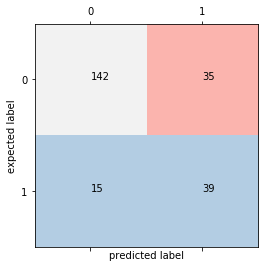

In [11]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [12]:
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.5270
Specificy  : 0.9045


In [13]:
def standardizeDataset(xTrain, xTest):
    scaler = StandardScaler()
    xTrain = scaler.fit_transform(xTrain)
    xTest = scaler.transform(xTest)
#The function below takes the dataset as the argument leaving out the target column and returns standardized dataset. Original dataset had 70 features that reduced to 14 after running the code below. 
#The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.
    pca = PCA(n_components = 0.55)
    xTrainStd = pca.fit_transform(xTrain)
    xTestStd = pca.transform(xTest)
    return xTrainStd, xTestStd
# you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1
#The function below takes the dataset as the argument leaving out the target column and returns standardized dataset.

In [14]:
xTrainStd, xTestStd = standardizeDataset(xTrain, xTest)

print("Columns before PCA")
print(xTrain.shape[1])
print("\nColumns after PCA")
print(xTrainStd.shape[1])

Columns before PCA
8

Columns after PCA
3


In [27]:
df.duplicated(keep='first') 

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [15]:
df = df.fillna(df.mean())
## normalising all the column to [0-1] for having same effect in calculations
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [16]:
df.isnull().sum()
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
print(x_scaled.shape , x_scaled.shape[0]*0.8)

(768, 9) 614.4000000000001


In [18]:
x_train = x_scaled[0:600,0:8]
y_train = x_scaled[0:600,8].astype(int)
x_test = x_scaled[600:750,0:8]
y_test = x_scaled[600:750,8].astype(int)
print(x_train.shape , y_train.shape , x_test.shape, y_test.shape)

(600, 8) (600,) (150, 8) (150,)


In [19]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.dot(vector1-vector2 , vector1-vector2))

In [20]:
D = np.zeros((150,600))
for i in range(150):
    for j in range(600):
        D[i,j] = euclidean_distance(x_train[j] , x_test[i])

In [21]:
np.sum(yTrain[D[i].argsort()[:5]])

/home/harshita/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


0.0

In [22]:
## generating test prediction
def KNN(k):
#     k = 5
    y_pred = np.zeros((150,) , dtype = int)
    for i in range(150):
        topknear = D[i].argsort()[:k]
        y_of_neighbour = y_train[topknear]
        y_sum_neighbour = int(np.sum(y_of_neighbour))
        if y_sum_neighbour < (k/2):
            y_pred[i] = 0
        else:
            y_pred[i] = 1

    accuracy = accuracy_score(y_pred , y_test)
    print("ACCURACY for k = " + str(k) + " is :" , accuracy*100 , "%")
    return y_pred

In [23]:
KNN(1) , KNN(3) , KNN(5), KNN(7), KNN(9), KNN(11);

ACCURACY for k = 1 is : 67.33333333333333 %
ACCURACY for k = 3 is : 71.33333333333334 %
ACCURACY for k = 5 is : 72.66666666666667 %
ACCURACY for k = 7 is : 76.66666666666667 %
ACCURACY for k = 9 is : 76.0 %
ACCURACY for k = 11 is : 74.0 %


In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction1 = model.predict(x_test)

/home/harshita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
confusion_matrix1 = metrics.confusion_matrix(y_test, prediction1)
confusion_matrix1

array([[90,  8],
       [26, 26]])

<Figure size 432x288 with 0 Axes>

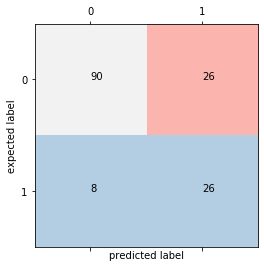

In [26]:
plt.figure()
plt.matshow(confusion_matrix1, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix1[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
# we ablated (i.e. removed) some of the repeated elements and the 
# following results are below:-
# True Positives (TP): (26) we correctly predicted that they do have diabetes
# True Negatives (TN): (90) we correctly predicted that they don't have diabetes
# False Positives (FP): (26) we incorrectly predicted that they do have diabetes
# False Negatives (FN): (8) we incorrectly predicted that they don't have diabetes